<a href="https://colab.research.google.com/github/Srikhanth14/Python_Data_Analysis_Projects/blob/main/Google_Play_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction:**

### The Google Play Store, where countless mobile apps reside, is a treasure trove of information. In this project, we embark on a journey to explore the Google Play Store dataset, a vast collection of data about these apps. Our mission is to uncover insights into app categories, user preferences, ratings, and other trends that shape the mobile app world.


## **Import the Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Data Collection and Pre-Processing**

In [ ]:
# Loading the Dataset
df = pd.read_csv("googleplaystore.csv")

In [ ]:
# Display first five rows of the dataset
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Number of rows and columns
print("Number of rows =", df.shape[0])
print("Number of columns =", df.shape[1])

Number of rows = 10841
Number of columns = 13


In [ ]:
# Get some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Checking for null values in the dataset
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# If there are null values, drop them
df.dropna(inplace=True)

In [ ]:
df.isnull().values.sum()

0

In [ ]:
# Checking for duplicated values in the dataset
df.duplicated().sum()

474

In [ ]:
# If there are duplicated values, drop them
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().values.sum()

0

In [ ]:
# Get statistical summary of the dataset
df.describe()

,Rating
count,8886.000000
mean,4.187959
std,0.522428
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


## **Exploratory Data Analysis (EDA)**

In [ ]:
# To display the unique values in the categories
unique_categories = df['Category'].unique()
unique_categories

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# To get the distribution values of each category
category_counts = df['Category'].value_counts()
category_counts

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

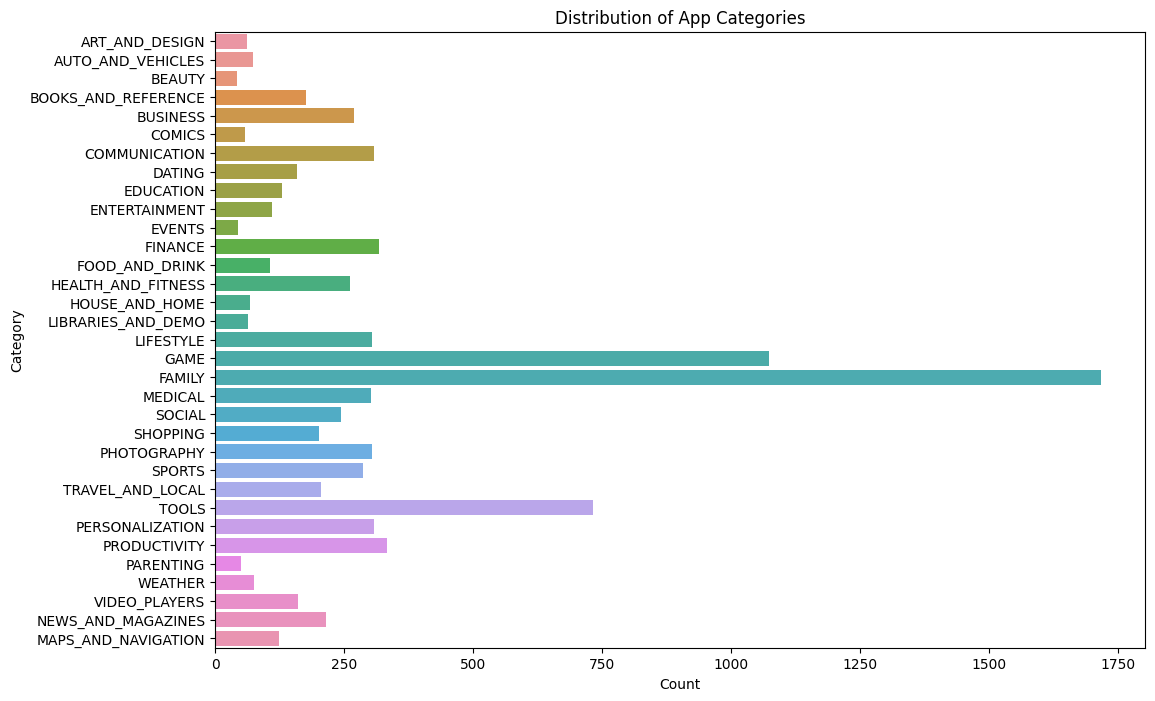

In [ ]:
# Plotting distribution of categories
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Category', order=unique_categories)
plt.title('Distribution of App Categories')
plt.ylabel('Category')
plt.xlabel('Count')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# To get average rating for each app
avg_rating_app = df.groupby('App')['Rating'].mean()
avg_rating_app.head(10)

App
+Download 4 Instagram Twitter                     4.5
- Free Comics - Comic Apps                        3.5
.R                                                4.5
/u/app                                            4.7
058.ba                                            4.4
1. FC Köln App                                    4.6
10 Best Foods for You                             4.0
10 Minutes a Day Times Tables                     4.1
10 WPM Amateur ham radio CW Morse code trainer    3.5
10,000 Quotes DB (Premium)                        4.1
Name: Rating, dtype: float64

In [ ]:
top_10_avg_rating=avg_rating_app.sort_values(ascending=False).head(10)
top_10_avg_rating

App
BP Log lite                      5.0
CQ ESPM                          5.0
BC MVA Fines                     5.0
CP Installer App                 5.0
COMSATS BOOK STORE FOR BS(CS)    5.0
Mindvalley U Tallinn 2018        5.0
CN Resident                      5.0
Monster Ride Pro                 5.0
Morse Player                     5.0
Movement BE                      5.0
Name: Rating, dtype: float64

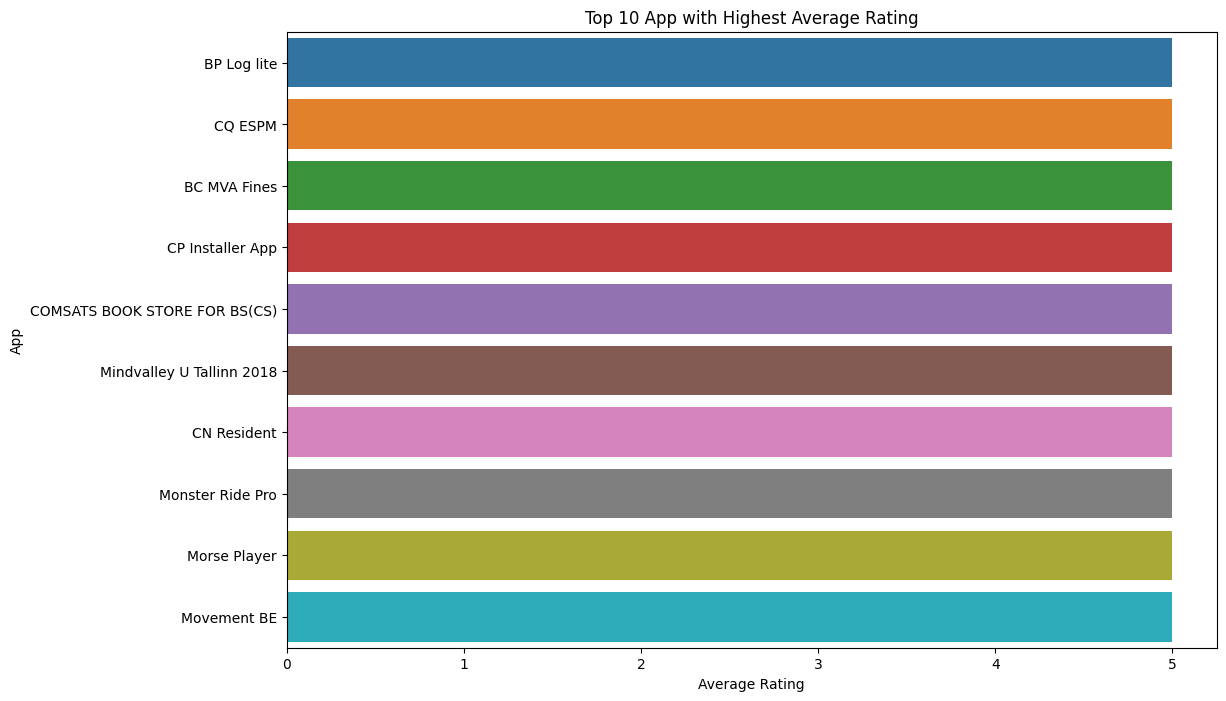

In [ ]:
# Plotting average ratings
plt.figure(figsize=(12, 8))
sns.barplot( y= top_10_avg_rating.index, x=top_10_avg_rating.values)
plt.title('Top 10 App with Highest Average Rating')
plt.ylabel('App')
plt.xlabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#To get the number of reviews for each app
avg_reviews_app = df.groupby('App')['Reviews'].mean()
avg_reviews_app.head()

App
+Download 4 Instagram Twitter    40467.0
- Free Comics - Comic Apps         115.0
.R                                 259.0
/u/app                             573.0
058.ba                              27.0
Name: Reviews, dtype: float64

In [ ]:
top_10_avg_reviews=avg_reviews_app.sort_values(ascending=False).head(10)
top_10_avg_reviews

App
ROBLOX                            4.941543e+61
8 Ball Pool                       2.028328e+54
Helix Jump                        2.495602e+40
Subway Surfers                    5.544453e+38
Candy Crush Saga                  4.485335e+38
Zombie Catchers                   1.650820e+35
Temple Run 2                      1.623722e+34
Farm Heroes Saga                  1.522826e+34
Duolingo: Learn Languages Free    1.257985e+34
Angry Birds Classic               1.113334e+34
Name: Reviews, dtype: float64

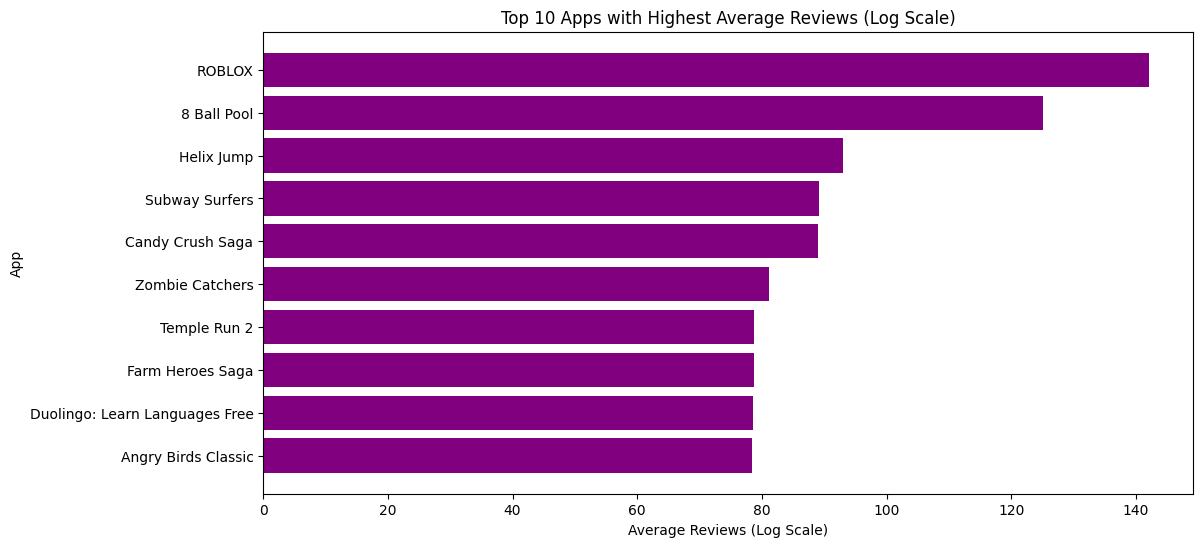

In [ ]:
# Normalize the data using log transformation
normalized_reviews = np.log1p(top_10_avg_reviews.values)

# Create a bar plot with normalized values
plt.figure(figsize=(12, 6))
plt.barh(top_10_avg_reviews.index, normalized_reviews, color='purple')
plt.title('Top 10 Apps with Highest Average Reviews (Log Scale)')
plt.xlabel('Average Reviews (Log Scale)')
plt.ylabel('App')
plt.gca().invert_yaxis()  # Inverting the y-axis to get the highest values at the top
plt.show()

In [ ]:
# Cleaning the 'Size' column
df['Size'] = df['Size'].str.replace("Varies with device", '0')
df['Size'] = df['Size'].str.replace("k", '')
df['Size'] = df['Size'].str.replace("+", '', regex=False)
df['Size'] = df['Size'].str.replace(",", "")
df['Size'] = df['Size'].str.replace("M", '')

In [ ]:
df.Size=df.Size.astype(float)

In [ ]:
#Average size of app based on Category
avg_app_size_based_on_category=df.groupby('Category')['Size'].mean().reset_index()
avg_app_size_based_on_category.head()

,Category,Size
0,ART_AND_DESIGN,12.303279
1,AUTO_AND_VEHICLES,21.341096
2,BEAUTY,13.666667
3,BOOKS_AND_REFERENCE,18.945198
4,BUSINESS,21.976296


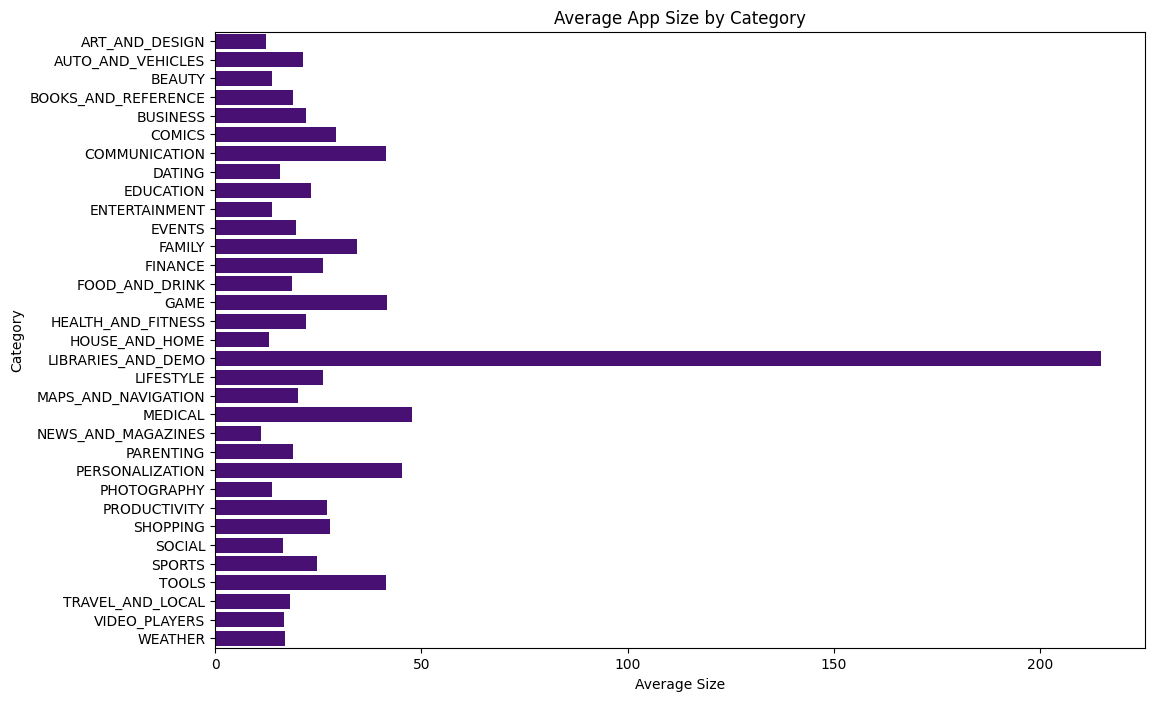

In [ ]:
# Plot the average size of App by category
plt.figure(figsize=(12, 8))
sns.barplot(data=avg_app_size_based_on_category, y='Category', x='Size', color='indigo')
plt.title('Average App Size by Category')
plt.ylabel('Category')
plt.xlabel('Average Size')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Top 5 largest apps in terms of size
top5_app_size = df.sort_values(by="Size", ascending=False).head()
top5_app_size

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8883,DTPay,SHOPPING,4.5,18,994.0,"1,000+",Free,0,Everyone,Shopping,"July 11, 2018",0.8.2,4.0 and up
7868,CT - DTC Lookup,TOOLS,4.1,41,986.0,"10,000+",Free,0,Everyone,Tools,"July 26, 2013",3,3.0 and up
6798,Battery Notifier BT Free,TOOLS,4.5,21979,982.0,"1,000,000+",Free,0,Everyone,Tools,"June 7, 2017",2.1.15,1.6 and up
2524,Super Ear Super Hearing,MEDICAL,4.0,122,980.0,"10,000+",Free,0,Everyone,Medical,"July 13, 2018",1.4,4.0 and up
5783,Dynamics AX,BUSINESS,3.7,244,976.0,"10,000+",Free,0,Everyone,Business,"October 26, 2015",3.3,2.3.3 and up


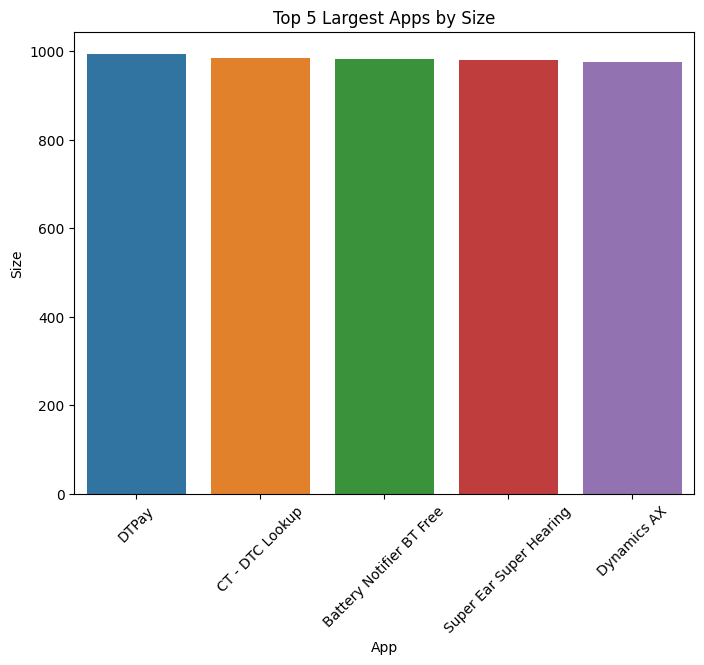

In [ ]:
# Plotting top 5 largest apps
plt.figure(figsize=(8, 6))
sns.barplot(x='App', y='Size', data=top5_app_size)
plt.title('Top 5 Largest Apps by Size')
plt.xlabel('App')
plt.ylabel('Size')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Cleaning the 'Installs' column

df['Installs'] = df['Installs'].str.replace("+", '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '').str.replace(' ', '').astype(float)

In [ ]:
# Average of Installed Apps
app_installs = df.groupby('App')['Installs'].mean().reset_index()
app_installs

,App,Installs
0,+Download 4 Instagram Twitter,1000000.0
1,- Free Comics - Comic Apps,10000.0
2,.R,10000.0
3,/u/app,10000.0
4,058.ba,100.0
...,...,...
8185,감성학원 BL 첫사랑,10000.0
8186,💎 I'm rich,10000.0
8187,"💘 WhatsLov: Smileys of love, stickers and GIF",1000000.0
8188,📏 Smart Ruler ↔️ cm/inch measuring for homework!,10000.0


In [ ]:
top10_app_installs=app_installs.sort_values(by='Installs',ascending=False).head(10)
top10_app_installs

,App,Installs
4006,Google Photos,1.000000e+09
4161,Hangouts,1.000000e+09
4013,Google Street View,1.000000e+09
3990,Google Chrome: Fast & Secure,1.000000e+09
4998,Maps - Navigate & Explore,1.000000e+09
3981,Google,1.000000e+09
4009,Google Play Movies & TV,1.000000e+09
5093,Messenger – Text and Video Chat for Free,1.000000e+09
7660,WhatsApp Messenger,1.000000e+09
4008,Google Play Games,1.000000e+09


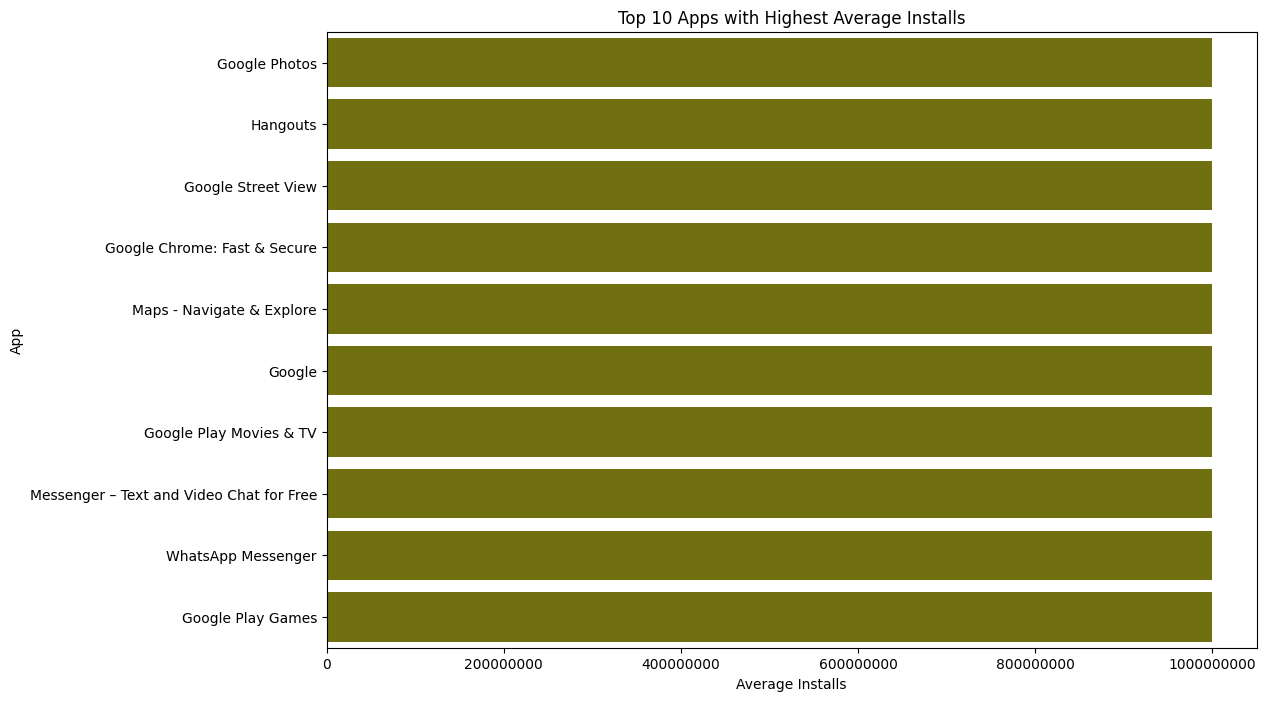

In [ ]:
# Plotting top 10 average installs
plt.figure(figsize=(12,8))
ax=sns.barplot(y='App', x='Installs', data=top10_app_installs, color='Olive')
plt.title('Top 10 Apps with Highest Average Installs')
plt.ylabel('App')
plt.xlabel('Average Installs')
ax.xaxis.set_major_formatter("{:.0f}".format)
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Distribution of Apps based on thier Types
df.Type.value_counts()

Free    8275
Paid     611
Name: Type, dtype: int64

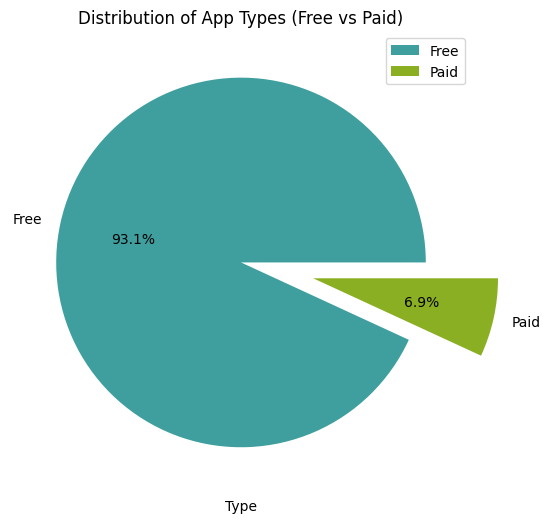

In [ ]:
# Plotting a pie chart for app types
plt.figure(figsize=(6, 6))
df['Type'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0,0.4], colors=['#3F9F9F','#8AAF22'])
plt.title('Distribution of App Types (Free vs Paid)')
plt.xlabel('Type')
plt.ylabel('')
plt.legend()
plt.show()

In [ ]:
# Cleaning the 'Price' Column
df.Price=df.Price.str.replace('$','', regex=False).astype(float)

In [ ]:
#Top 10 apps with the Average price
avg_price_app = df.groupby('App')['Price'].mean()
top10_avg_price_app=avg_price_app.sort_values(ascending=False).head(10)
top10_avg_price_app=top10_avg_price_app.reset_index()
top10_avg_price_app

,App,Price
0,I'm Rich - Trump Edition,400.00
1,most expensive app (H),399.99
2,I am Rich!,399.99
3,I am Rich Plus,399.99
4,I Am Rich Pro,399.99
5,I Am Rich Premium,399.99
6,I AM RICH PRO PLUS,399.99
7,I am Rich,399.99
8,I am rich(premium),399.99
9,I am rich,399.99


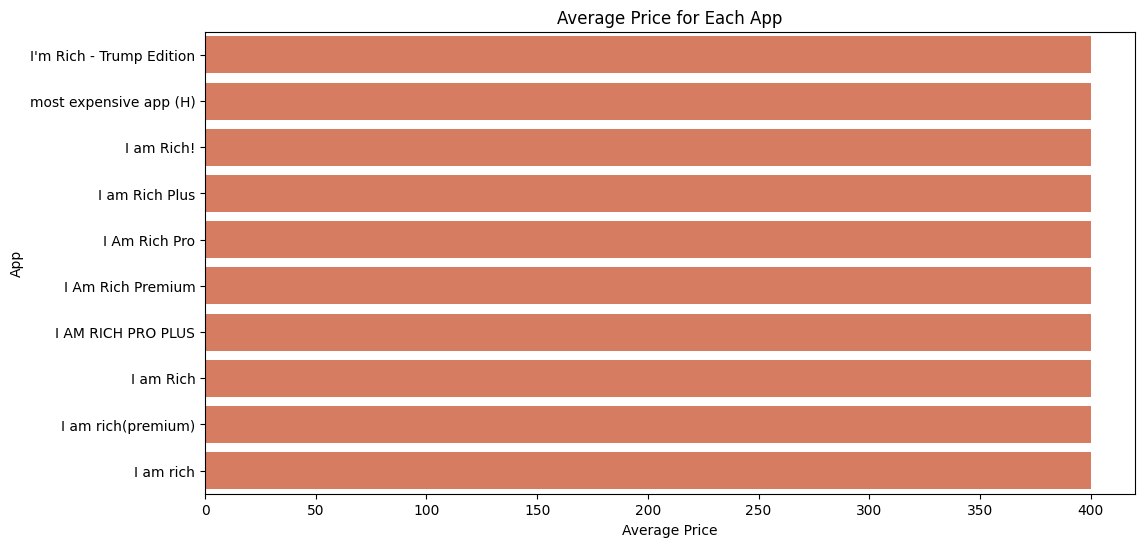

In [ ]:
# Plotting average prices
plt.figure(figsize=(12, 6))
sns.barplot(y='App', x='Price', data=top10_avg_price_app, color='#E9724D')
plt.title('Average Price for Each App')
plt.ylabel('App')
plt.xlabel('Average Price')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Apps available in each content rating category
content_rating_counts = df['Content Rating'].value_counts()
content_rating_counts

Everyone           7089
Teen               1022
Mature 17+          411
Everyone 10+        360
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

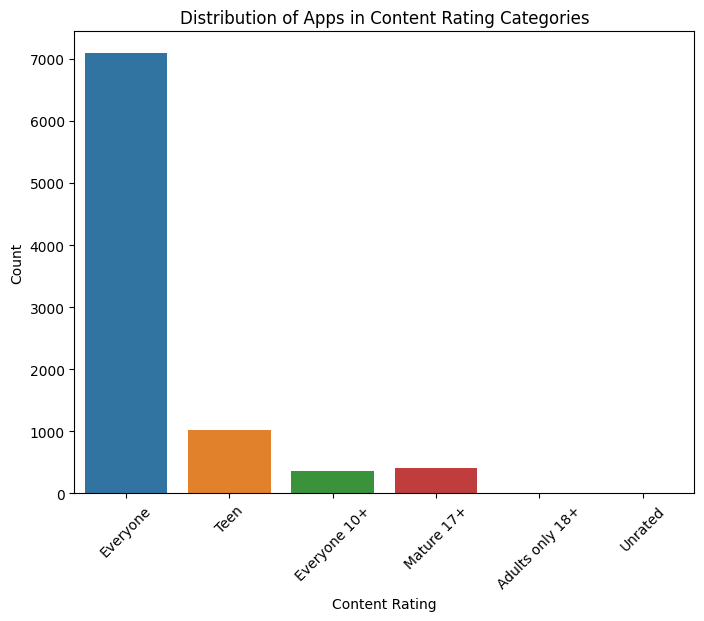

In [ ]:
# Plotting content rating distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Content Rating', data=df)
plt.title('Distribution of Apps in Content Rating Categories')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

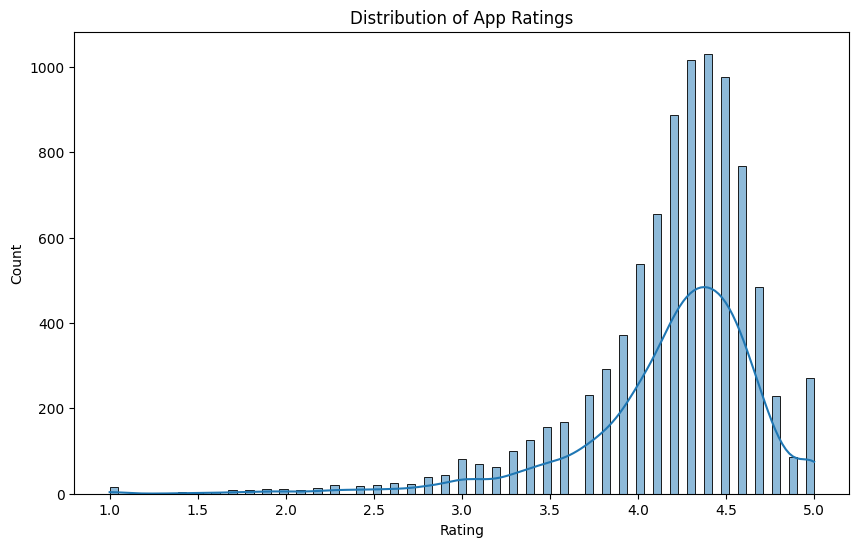

In [ ]:
# Number of apps in different rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Rating', kde=True)
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Different genres of the apps
unique_genres = df['Genres'].unique()
unique_genres

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Auto & Vehicles', 'Beauty',
       'Books & Reference', 'Business', 'Comics', 'Comics;Creativity',
       'Communication', 'Dating', 'Education;Education', 'Education',
       'Education;Creativity', 'Education;Music & Video',
       'Education;Action & Adventure', 'Education;Pretend Play',
       'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role Playing', 'Simulation;Education',
 

In [ ]:
# Number of apps belong to multiple genres
multiple_genres = df[df['Genres'].str.contains(';')]
multiple_genres.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
26,Colorfit - Drawing & Coloring,ART_AND_DESIGN,4.7,20260,25.0,500000.0,Free,0.0,Everyone,Art & Design;Creativity,"October 11, 2017",1.0.8,4.0.3 and up
36,UNICORN - Color By Number & Pixel Art Coloring,ART_AND_DESIGN,4.7,8145,24.0,500000.0,Free,0.0,Everyone,Art & Design;Creativity,"August 2, 2018",1.0.9,4.4 and up


In [ ]:
len(multiple_genres)

447

In [ ]:
multiple_genres['Genres'].value_counts()

Education;Education            44
Educational;Education          35
Casual;Pretend Play            30
Entertainment;Music & Video    23
Racing;Action & Adventure      20
                               ..
Arcade;Pretend Play             1
Music & Audio;Music & Video     1
Health & Fitness;Education      1
Casual;Music & Video            1
Strategy;Creativity             1
Name: Genres, Length: 68, dtype: int64

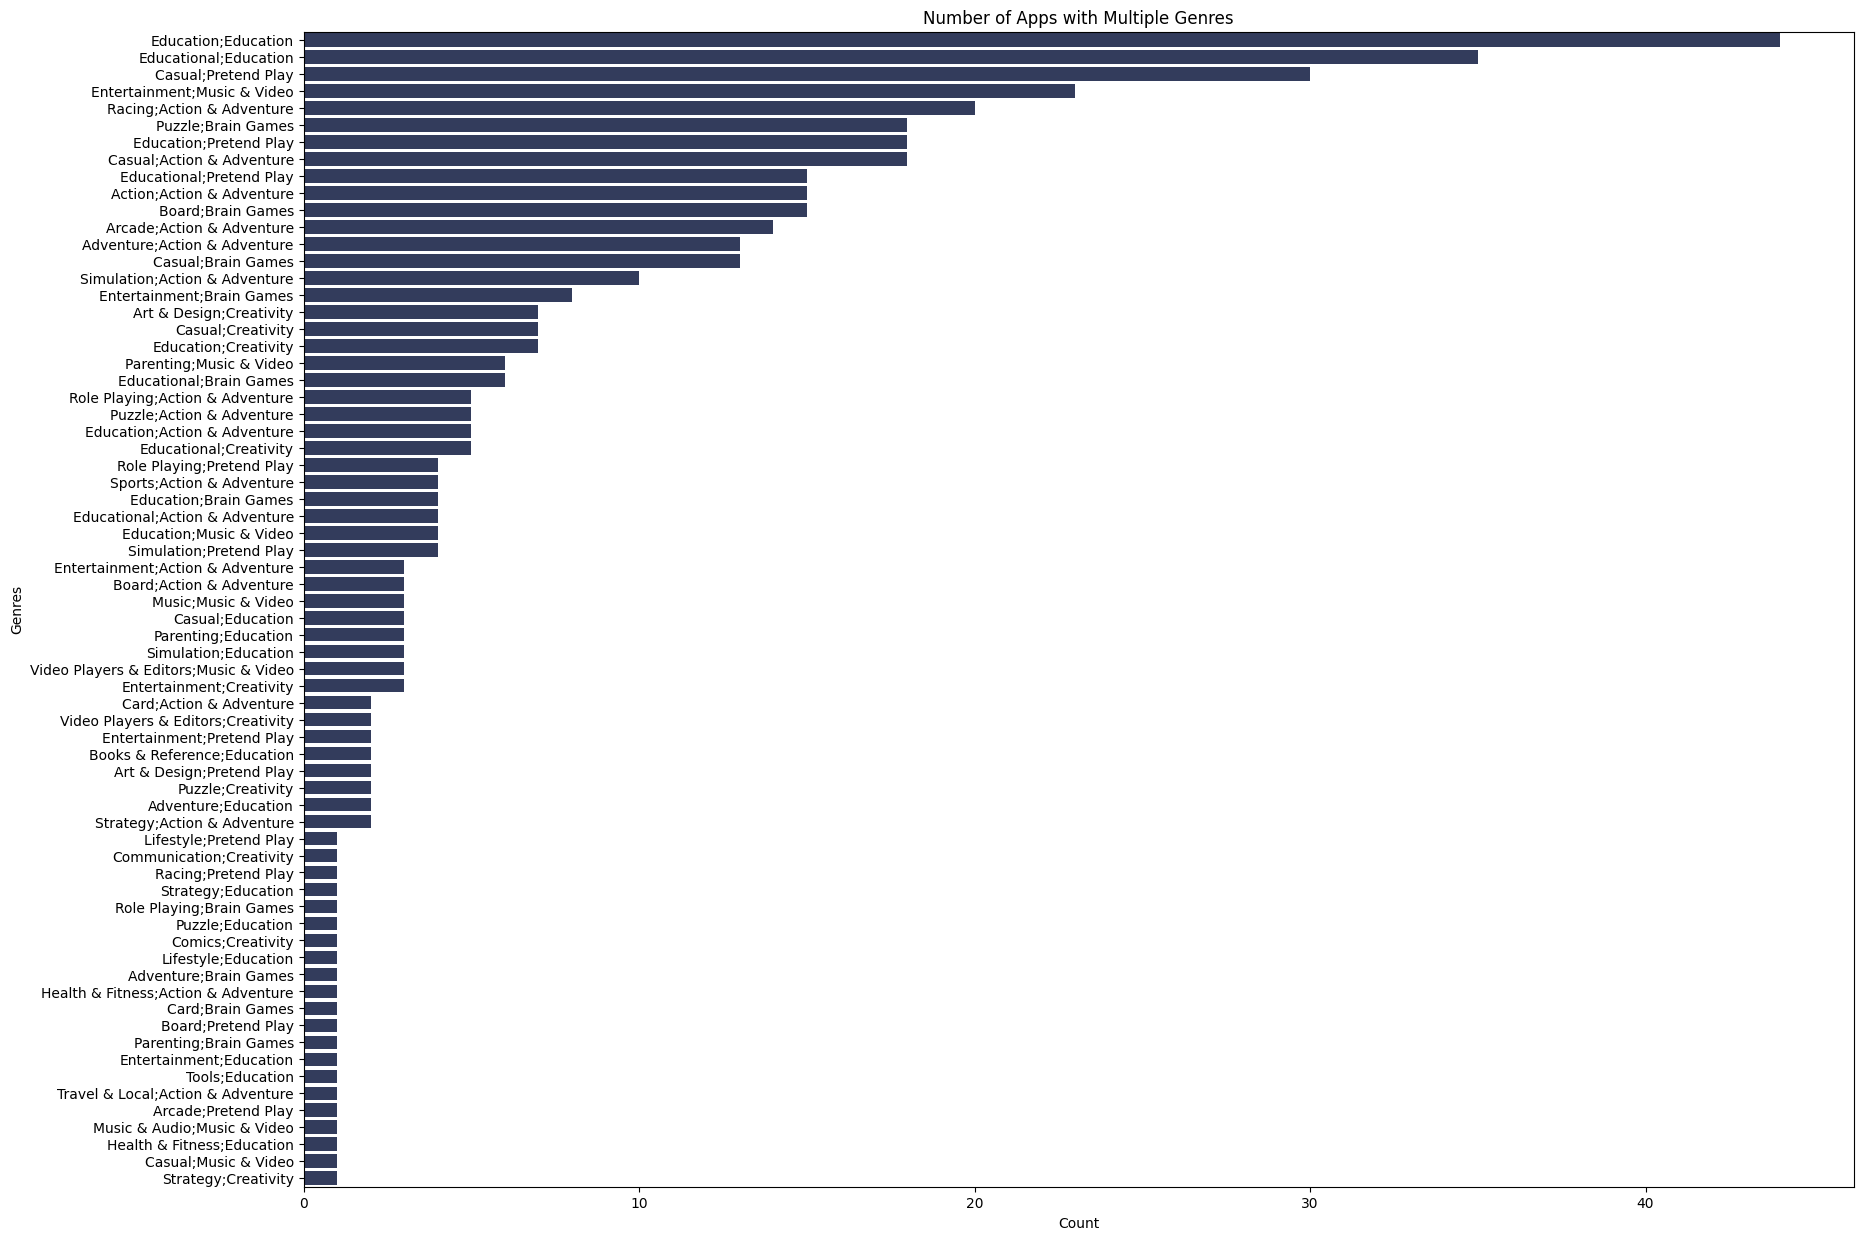

In [ ]:
plt.figure(figsize=(20, 15))
sns.countplot(y='Genres', data=multiple_genres, order=multiple_genres['Genres'].value_counts().index, color="#2C3863")
plt.title('Number of Apps with Multiple Genres')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

In [ ]:
# correlation between numeric variables
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,Rating,Size,Installs,Price
Rating,1.000000,-0.030285,0.050869,-0.022371
Size,-0.030285,1.000000,-0.027872,0.021869
Installs,0.050869,-0.027872,1.000000,-0.011334
Price,-0.022371,0.021869,-0.011334,1.000000


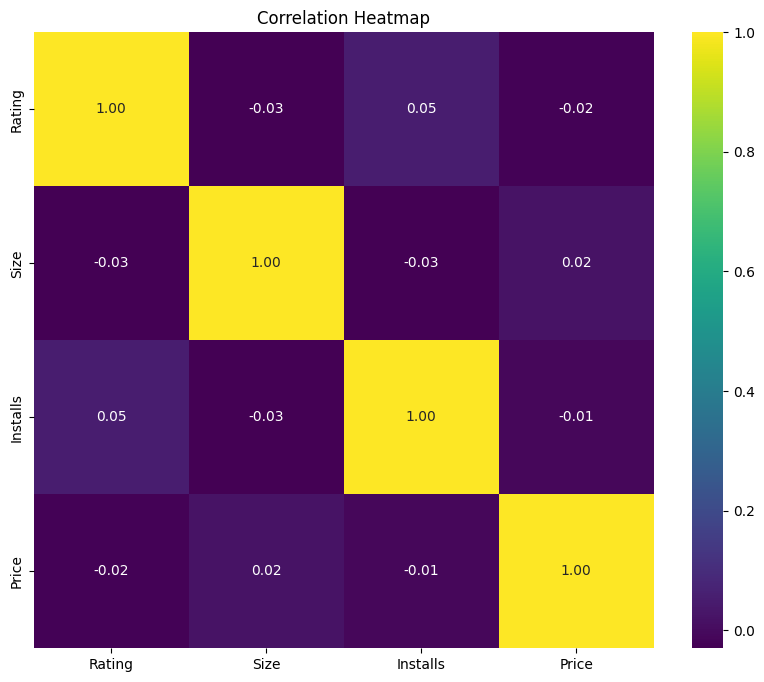

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Time series plot for app ratings over time
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated'].head()

0   2018-01-07
1   2018-01-15
2   2018-08-01
3   2018-06-08
4   2018-06-20
Name: Last Updated, dtype: datetime64[ns]

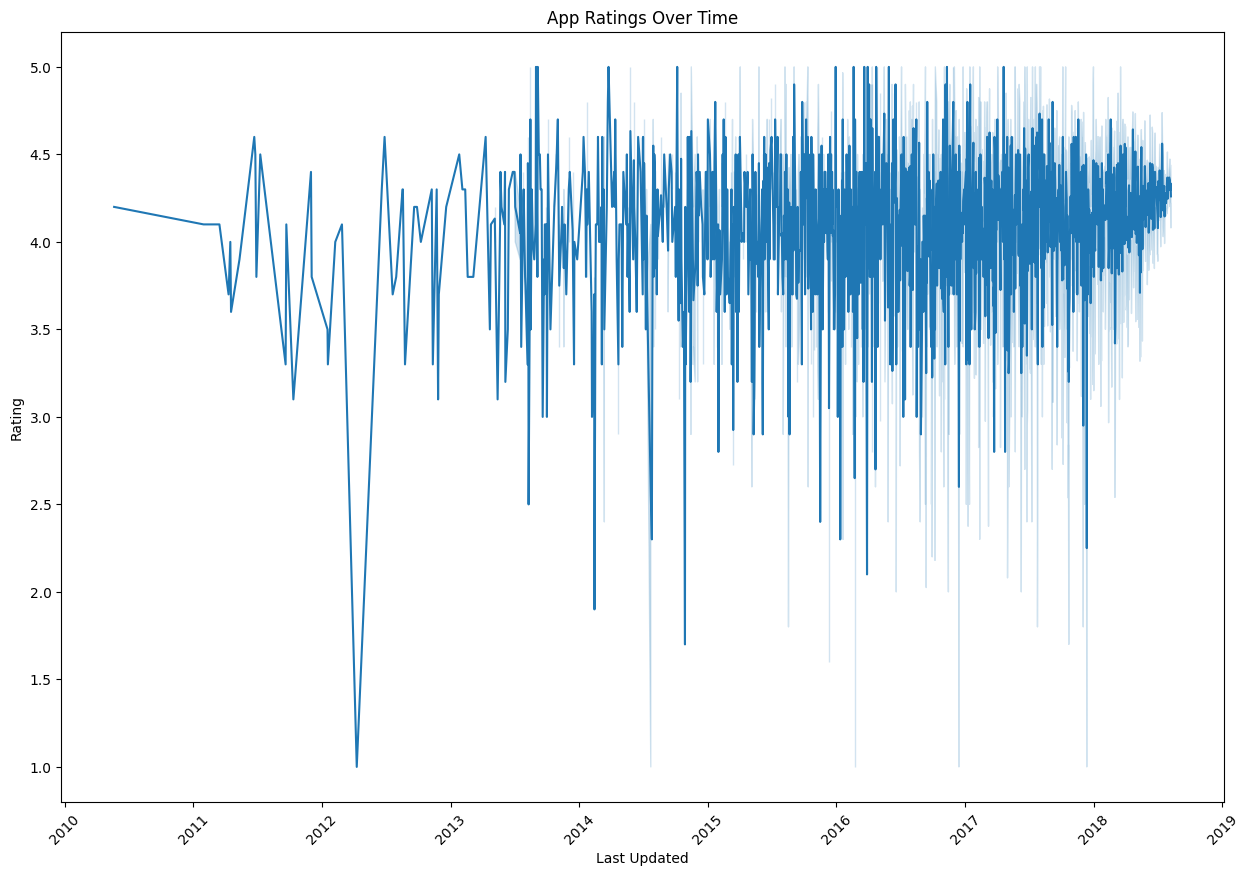

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x='Last Updated', y='Rating')
plt.title('App Ratings Over Time')
plt.xlabel('Last Updated')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [ ]:
# Filter out rows with non-numeric "Current Ver"
df = df[df['Current Ver'].str.match(r'^\d+(\.\d+)*$')]

In [ ]:
df['Current Ver'].head(2)

0    1.0.0
1    2.0.0
Name: Current Ver, dtype: object

In [ ]:
# Average Ratings by App Version
avg_ratings_current_ver = df.groupby('Current Ver')['Rating'].mean()
avg_ratings_current_ver.head()

Current Ver
0.0.0.2    4.2
0.0.1      4.1
0.0.2      3.9
0.0.3      4.4
0.0.4      5.0
Name: Rating, dtype: float64

In [ ]:
df['Android Ver']=df['Android Ver'].str.replace(' and up','')
df['Android Ver']=df['Android Ver'].str.replace('W','')
df['Android Ver'].head()

0    4.0.3
1    4.0.3
2    4.0.3
4      4.4
5      2.3
Name: Android Ver, dtype: object

In [ ]:
# Average Ratings by Android Version
avg_ratings_android = df.groupby('Android Ver')['Rating'].mean()
avg_ratings_android.head()

Android Ver
1.0      4.050000
1.5      4.014286
1.6      4.075000
2.0      4.348000
2.0.1    4.328571
Name: Rating, dtype: float64

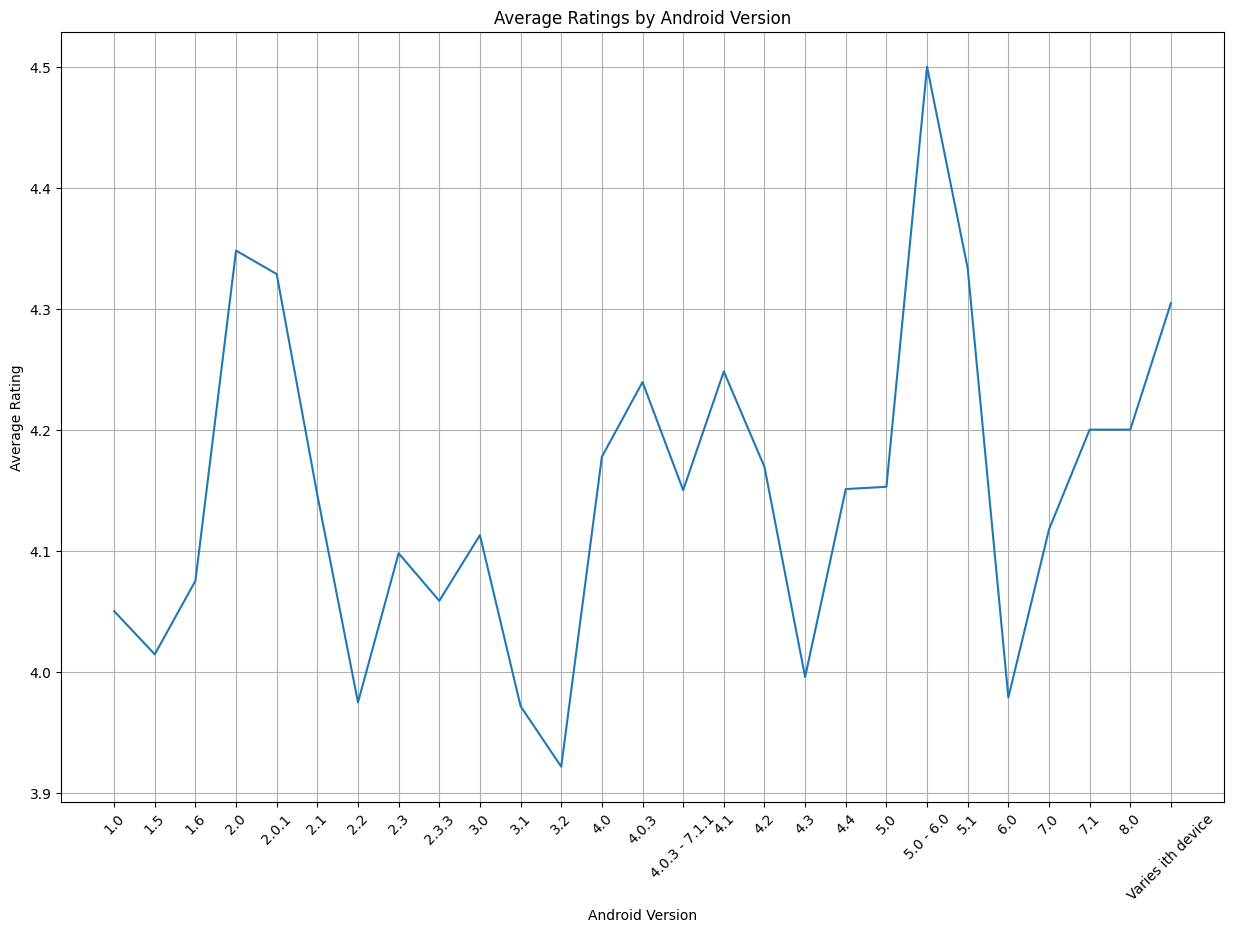

In [ ]:
plt.figure(figsize=(15, 10))
sns.lineplot(x=avg_ratings_android.index, y=avg_ratings_android.values)
plt.title('Average Ratings by Android Version')
plt.xlabel('Android Version')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## **Project Summary:**

### This project involves a comprehensive investigation of the Google Play Store dataset. We start by preparing the data, cleaning it up, and making sure it's ready for analysis. Through exploratory data analysis (EDA), we dive into the dataset to understand which types of apps people like the most, what users are saying in their reviews, and much more. We even look at how app versions, both current and for Android, impact user ratings and how ratings change over time. By examining the connections between different data points, we extract valuable insights. These insights are not only beneficial for app developers and marketers but also for anyone with an interest in the world of mobile apps.